In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = df = pd.read_excel("/Users/hachikaruanyakwee/Documents/Git Hub/Online_Retail_EDA/Online_Retail_durry.xlsx") # Import dataset

In [3]:
pd.set_option('display.max_columns', 200) # Display all columns

In [4]:
df.head() # Display the top 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalSales,CustomerID,GuestOrders,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850,0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850,0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850,0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850,0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850,0,United Kingdom


In [5]:
df.tail()  # Display the last 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalSales,CustomerID,GuestOrders,Country
399651,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680,0,France
399652,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680,0,France
399653,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680,0,France
399654,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680,0,France
399655,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,14.85,12680,0,France


In [6]:
df.reset_index(inplace=True)

In [7]:
print("\nDataset overview:")
df.info()  # Overview of the dataset, including column types and null counts


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399656 entries, 0 to 399655
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        399656 non-null  int64         
 1   InvoiceNo    399656 non-null  object        
 2   StockCode    399656 non-null  object        
 3   Description  399656 non-null  object        
 4   Quantity     399656 non-null  int64         
 5   InvoiceDate  399656 non-null  datetime64[ns]
 6   UnitPrice    399656 non-null  float64       
 7   TotalSales   399656 non-null  float64       
 8   CustomerID   399656 non-null  int64         
 9   GuestOrders  399656 non-null  int64         
 10  Country      399656 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 33.5+ MB


In [8]:
df.shape  # Number of rows and columns

(399656, 11)

In [9]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all'))  # Summary statistics for numerical and categorical data



Statistical Summary:
                index  InvoiceNo StockCode  \
count   399656.000000   399656.0    399656   
unique            NaN    21785.0      3676   
top               NaN   576339.0    85123A   
freq              NaN      541.0      2065   
mean    199827.500000        NaN       NaN   
min          0.000000        NaN       NaN   
25%      99913.750000        NaN       NaN   
50%     199827.500000        NaN       NaN   
75%     299741.250000        NaN       NaN   
max     399655.000000        NaN       NaN   
std     115370.893929        NaN       NaN   

                               Description       Quantity  \
count                               399656  399656.000000   
unique                                3888            NaN   
top     WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq                                  2058            NaN   
mean                                   NaN      12.195671   
min                                    NaN  -80995.000000  

In [10]:
df.isnull().sum()  # Number of missing values in each column. In this case highlighting number of orders that come from non-subscribers.

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
TotalSales     0
CustomerID     0
GuestOrders    0
Country        0
dtype: int64

In [11]:
df.isnull().mean() * 100  # Returns the percentage of missing values. In this case highlighting % of orders that come from non-subscribers.

index          0.0
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
TotalSales     0.0
CustomerID     0.0
GuestOrders    0.0
Country        0.0
dtype: float64

In [12]:
df['CustomerID'].nunique()  # Checking for number of subscribers

4362

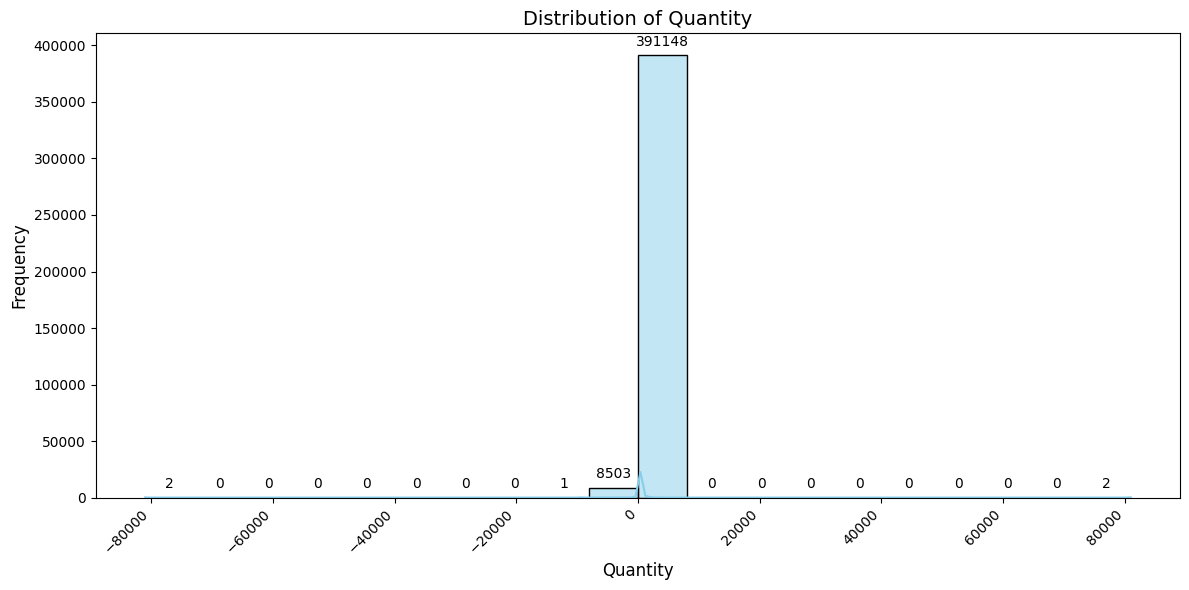

In [13]:
#Distribution of Sales
def plot_numerical_distribution(df, numerical_col, title, bins=20, kde=True, color='skyblue'):
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    ax = sns.histplot(
        data=df,
        x=numerical_col,
        bins=bins,
        kde=kde,
        color=color
    )
    
    # Add title and labels
    plt.title(title, fontsize=14)
    plt.xlabel(numerical_col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add data labels manually (approximating counts for bars)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 10),  # Adjust vertical positioning
                    textcoords='offset points')
    
    # Customize
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Call the function with df
plot_numerical_distribution(df, 'Quantity', 'Distribution of Quantity')

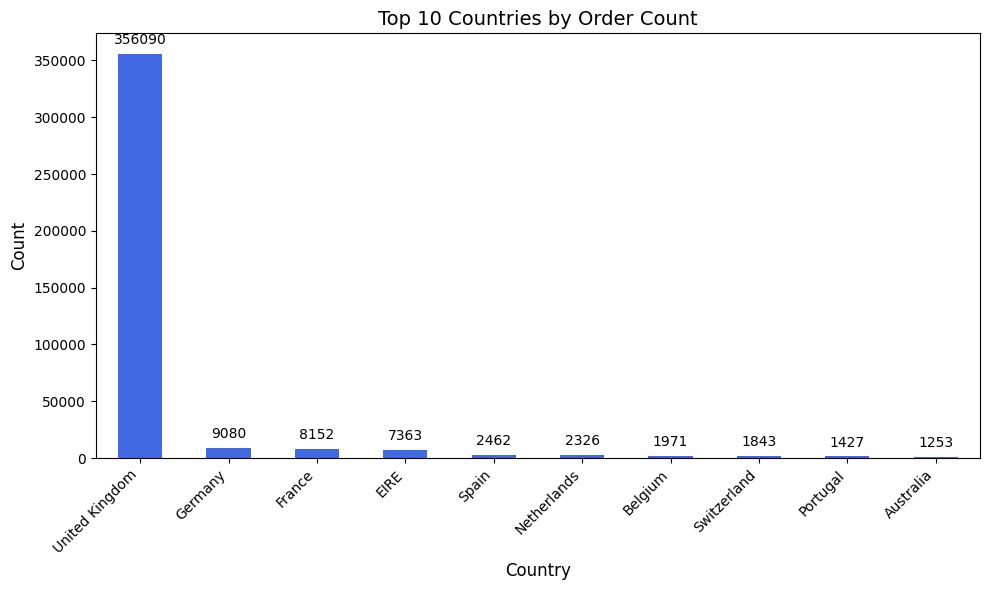

In [14]:
#Trending Regions(OrderCount)
def plot_categorical_data(df, category_col, title, max_categories=10, color='royalblue'):
    # Value counts and limit to the top categories
    value_counts = df[category_col].value_counts().head(max_categories)

    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = value_counts.plot(kind='bar', color=color)

    # Add title and labels
    plt.title(title, fontsize=14)
    plt.xlabel(category_col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add data labels with automatic positioning
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, padding=5)

    # Customize
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Call the function with df
plot_categorical_data(df, 'Country', 'Top 10 Countries by Order Count')

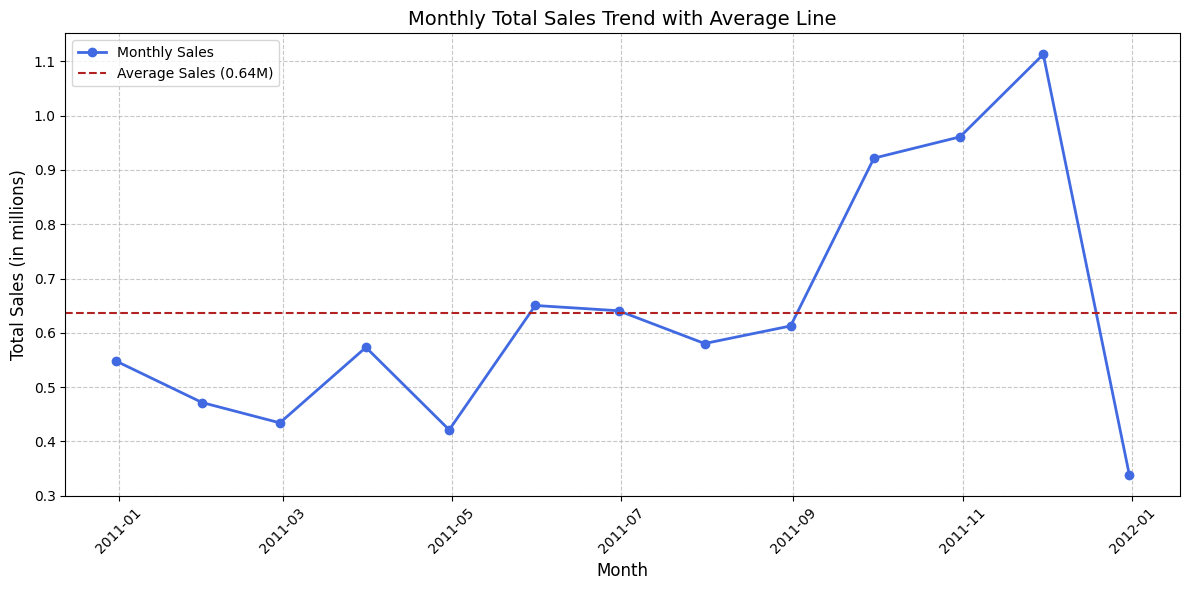

In [15]:
#Sales Trend
def create_time_trend_chart(df):
    # Ensure datetime format for 'InvoiceDate' and set as index
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure the correct datetime format
    df.set_index('InvoiceDate', inplace=True)

    # Resample monthly and sum 'TotalSales'
    monthly_sales = df['TotalSales'].resample('ME').sum()

    # Convert the sales to millions for better readability
    monthly_sales_in_millions = monthly_sales / 1e6

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

    # Plot the time trend
    ax.plot(monthly_sales_in_millions, color='royalblue', marker='o', linewidth=2, label='Monthly Sales')

    # Add data labels with improved formatting
    labels = monthly_sales_in_millions.apply(lambda x: f'{x:.2f}M')
    for i, label in enumerate(labels):
        ax.annotate(label, xy=(i, monthly_sales_in_millions.iloc[i]), 
                    ha='center', va='bottom', fontsize=8)

    # Add average sales trendline
    average_sales = monthly_sales_in_millions.mean()
    ax.axhline(y=average_sales, color='firebrick', linestyle='--', 
               label=f'Average Sales ({average_sales:.2f}M)')

    # Customize
    ax.set_title('Monthly Total Sales Trend with Average Line', fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Total Sales (in millions)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
    ax.tick_params(axis='x', rotation=45)
    ax.legend(fontsize=10)

    # Tight layout
    plt.tight_layout()
    plt.show()

# Call the function with df
create_time_trend_chart(df)

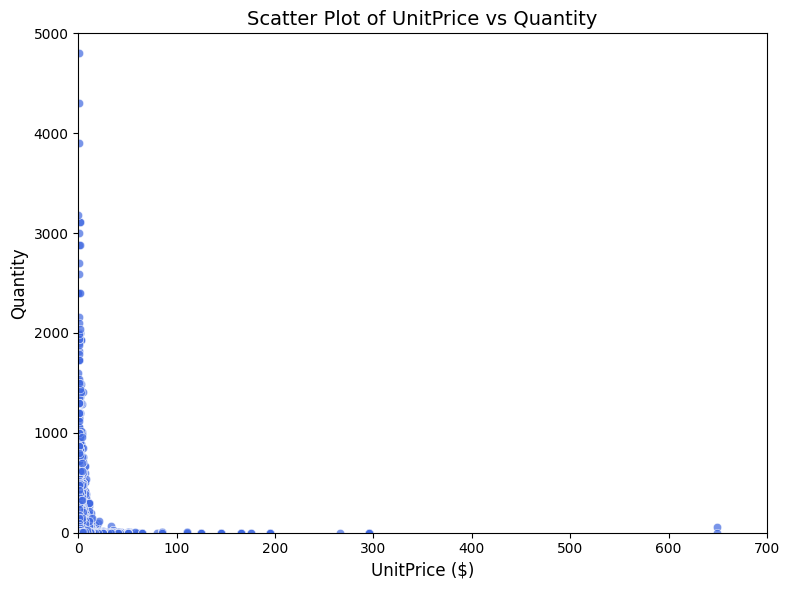

In [16]:
def plot_scatter(df, x_col, y_col, title, x_limit=None, y_limit=None):
    # Create the scatter plot
    plt.figure(figsize=(8, 6))

    sns.scatterplot(
        x=df[x_col],
        y=df[y_col],
        color='royalblue',  # Set color of the points
        alpha=0.7,  # Set transparency for better visibility
        hue=None,  # Remove hue argument for single color scatter plot
        style=None  # Remove style argument for single marker style
    )

    # Set axis limits to focus on relevant data
    if x_limit:
        plt.xlim(x_limit)  # Set x-axis limit if specified
    if y_limit:
        plt.ylim(y_limit)  # Set y-axis limit if specified

    # Add title and labels
    plt.title(title, fontsize=14)
    
    # Add $ sign to x-axis label for clarity
    plt.xlabel(f'{x_col} ($)', fontsize=12)  # Adding $ to x-axis label
    
    plt.ylabel(y_col, fontsize=12)

    # Customize layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Define x and y axis limits to zoom into relevant range
x_limit = (0, 700)  # Limit x-axis from 0 to 700 (adjust as needed)
y_limit = (0, 5000)  # Limit y-axis (adjust as needed depending on Quantity distribution)

# Example usage
plot_scatter(df, 'UnitPrice', 'Quantity', 'Scatter Plot of UnitPrice vs Quantity', x_limit=x_limit, y_limit=y_limit)

In [17]:
# Feature engineering - Adding new columns
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Total revenue per item
df['ProfitMargin'] = df['Revenue'] * 0.2  # Assuming a fixed profit margin

In [18]:
def plot_treemap(df, group_col, value_col, title, color_col=None, color_scale='viridis'):
    # Ensure that the 'ProfitMargin' is numeric
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')

    # Drop rows where the group column or value column are null
    df_clean = df.dropna(subset=[group_col, value_col])

    # Group data and calculate the sum of the value column
    if color_col is None:
        grouped_data = df_clean.groupby(group_col)[value_col].sum().reset_index()
    else:
        grouped_data = df_clean.groupby([group_col, color_col])[value_col].sum().reset_index()

    # Ensure that the group column is treated as categorical
    grouped_data[group_col] = grouped_data[group_col].astype(str)

    # Create the Treemap chart using plotly
    fig = px.treemap(
        grouped_data,
        path=[group_col],  # Define the hierarchy (grouping by StockCode)
        values=value_col,  # Values to size the blocks by (ProfitMargin)
        color=color_col,  #color the blocks by the specified column
        color_continuous_scale=color_scale,  # Color scale for the blocks
        title=title  # Title of the treemap
    )

    # Show the Treemap
    fig.show()


plot_treemap(df, 'StockCode', 'ProfitMargin', 'Treemap of StockCode by Profit Margin')

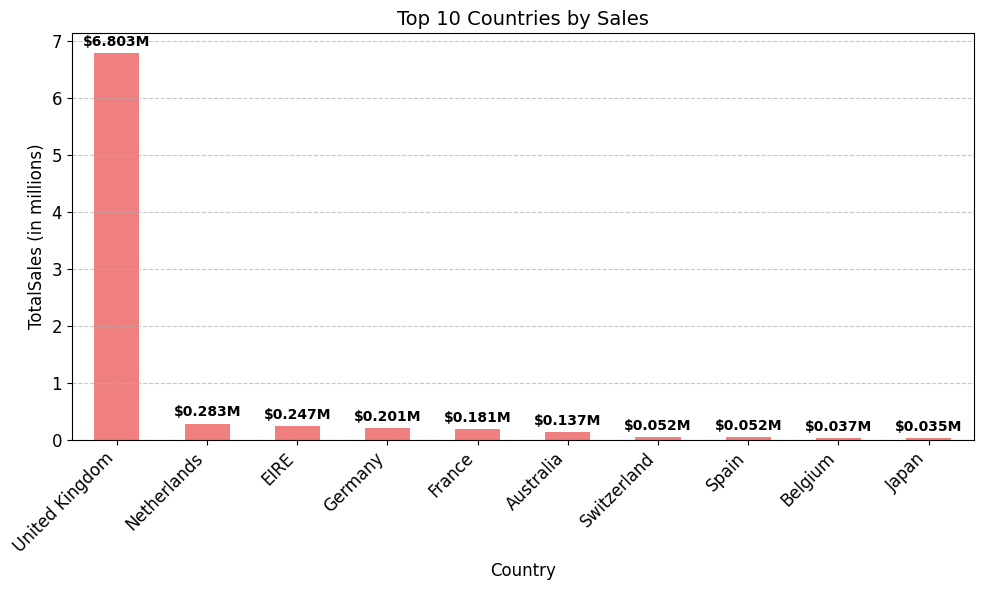

In [19]:
def plot_aggregation(df, group_col, value_col, title, max_categories=10, color='lightcoral'):
    # Aggregate total sales and convert to millions
    aggregated_data = df.groupby(group_col)[value_col].sum().sort_values(ascending=False).head(max_categories)
    aggregated_data_in_millions = aggregated_data / 1e6  # Convert to millions
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = aggregated_data_in_millions.plot(kind='bar', color=color)
    
    # Add title and labels
    plt.title(title, fontsize=14)
    plt.xlabel(group_col, fontsize=12)
    plt.ylabel(f'{value_col} (in millions)', fontsize=12)
    
    # Add data labels with the $ sign and M (millions), formatted to 3 decimal places
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, padding=3, color='black', weight='bold', 
                     labels=[f'${x:.3f}M' for x in aggregated_data_in_millions])
    
    # Customize aesthetics
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability and adjust font size
    plt.yticks(fontsize=12)  # Adjust y-axis label font size
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels

    # Show the plot
    plt.show()

# Example usage
plot_aggregation(df, 'Country', 'TotalSales', 'Top 10 Countries by Sales')